In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
df = pd.read_csv('data_for_modeling.csv')
# df2= pd.read_csv('yad2_cars_data_final_cleaned.csv')

In [129]:
import numpy as np

# Function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


In [15]:
# bool_cols = ['4x4', 'valid_test', 'magnesium_wheels', 'distance_control', 'economical', 'adaptive_cruise_control', 'cruise_control']
# df2[bool_cols] = df2[bool_cols].replace({True: 1, False: 0})
# df2


In [130]:
df = df.drop('Unnamed: 0', axis=1)
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [109]:
df['brand'] = df['brand'].str.replace(r'G\.', 'MG', regex=True)
df['model'] = df['model'].str.replace('MG 350', '350', regex=True)

In [110]:
df['brand'] = df['brand'].str.replace('G', 'MG', regex=True)

In [111]:
mask = df['brand'] == 'Infiniti QX50'
df.loc[mask, 'model'] = df.loc[mask, 'model'].str.replace('Infiniti EX37', 'QX 50', regex=True)
df[df['brand'] == 'Infiniti QX50']

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
211,Infiniti QX50,QX 50,Infiniti QX50 / EX37,10000.0,2023,1,268.0,False,petrol,2.0,True,True,True,False,False,False
943,Infiniti QX50,QX 50,Infiniti QX50 / EX37,170000.0,2022,1,268.0,False,petrol,2.0,True,True,True,False,False,False
2996,Infiniti QX50,QX 50,Infiniti QX50 / EX37,74900.0,2015,2,320.0,True,petrol,3.7,True,False,False,False,False,False
4198,Infiniti QX50,QX 50,Infiniti QX50 / EX37,10900.0,2019,2,268.0,True,petrol,2.0,False,True,False,False,True,True
5052,Infiniti QX50,QX 50,Infiniti QX50 / EX37,39500.0,2010,3,315.0,True,petrol,3.7,True,True,False,False,False,False
5217,Infiniti QX50,QX 50,Infiniti QX50 / EX37,65000.0,2009,2,315.0,True,petrol,3.7,False,False,False,False,False,False
7450,Infiniti QX50,QX 50,Infiniti QX50 / EX37,60000.0,2012,2,315.0,True,petrol,3.7,False,False,False,False,False,False


In [112]:
df.loc[df['brand'] == 'Infiniti QX50', 'brand'] = 'Infiniti'

In [113]:
df[df['brand'] == 'Infiniti']

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
211,Infiniti,QX 50,Infiniti QX50 / EX37,10000.0,2023,1,268.0,False,petrol,2.0,True,True,True,False,False,False
347,Infiniti,QX55,Infiniti QX55,298000.0,2024,1,268.0,True,petrol,2.0,False,True,False,False,False,False
466,Infiniti,QX60,Infiniti QX60,340000.0,2023,1,295.0,True,petrol,3.5,True,True,False,False,False,False
724,Infiniti,QX55,Infiniti QX55,285000.0,2023,1,268.0,True,petrol,2.0,True,False,False,False,True,True
943,Infiniti,QX 50,Infiniti QX50 / EX37,170000.0,2022,1,268.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,Infiniti,Qx70 Fx37,Infiniti QX70 / FX37,9901.0,2011,3,315.0,True,petrol,3.7,False,False,False,False,False,False
15084,Infiniti,Qx70 Fx37,Infiniti QX70 / FX37,139900.0,2018,1,320.0,True,petrol,3.7,False,False,True,False,True,True
15150,Infiniti,Qx30,Infiniti QX30,106500.0,2019,2,211.0,False,petrol,2.0,False,False,False,False,False,False
15152,Infiniti,Q30,Infiniti Q30,97000.0,2018,2,211.0,True,petrol,2.0,False,False,False,False,False,False


In [83]:
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [114]:
brand_corrections = {
    'MGenesis': 'Genesis',
    'Copra': 'Cupra',
    'MMG': 'MG',
    'Infiniti QX50': 'Infiniti',
    'Ivoco': 'Iveco',
    'Opal': 'Opel',
    'MGMC': 'GMC',  # Assuming it's GMC, but could be MG
    'Chevy': 'Chevrolet',
    'Mann': 'Mann',  # Assuming it's an error, but could be a valid brand
    'MGreat Wall': 'Great Wall',
    'Mercedes-Benz-Benz': 'Mercedes-Benz'
}

for old, new in brand_corrections.items():
    if new is not None:
        df['brand'] = df['brand'].replace(old, new, regex=True)


In [85]:
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [73]:
# model_corrections = {
#         'Bclass Taxi': 'B-Class',
#         'Rover Range': 'Range Rover',
#         'Glc': 'GLC',
#         'Cls': 'CLS',
#         'Cx5': 'CX5',
#         'Xv': 'XV',
#         'Wrangler': 'Wrangler',
#         'Asx': 'ASX',
#         'Buys': 'Buys',  # Check if this is a valid model name
#         'Rx450H': 'RX450H',
#         'Vclass': 'V-Class',
#         'A': 'A',
#         'Gl': 'GL',
#         'Cx30': 'CX30',
#         'C': 'C',
#         'Bclass': 'B-Class',
#         'I10': 'i10',
#         'Xt5': 'XT5',
#         'Xm': 'XM',
#         'Rover Discovery Sport': 'Discovery Sport',
#         'I20 Cross': 'i20 Cross',
#         'I20': 'i20',
#         'Cclass Taxi': 'C-Class',
#         'Berlingo 3Rd Generation 2018 Onwards': 'Berlingo',
#         'Iphone 2X4': '',  # Remove iPhone models
#         'I30Cw': 'i30CW',
#         'I30': 'i30',
#         'Cle': 'CLE',
#         'Romeo Stelvio': 'Stelvio',
#         'Blazer 2019 And Later': 'Blazer',
#         'I35': 'i35',
#         'Cla': 'CLA',
#         'Sclass': 'S-Class',
#         'I8': 'i8',
#         'Rover Discovery 4': 'Discovery 4',
#         'Xf': 'XF',
#         'Gla': 'GLA',
#         'Nx': 'NX',
#         'Qx55': 'QX55',
#         'Refs': 'Refs',  # Check if this is a valid model name
#         'Berlingo 1St Generation Until 2012': 'Berlingo',
#         'Berlingo 2Nd Generation 20082019': 'Berlingo',
#         'Yukon Denali': 'Yukon Denali',
#         '500C': '500C',
#         'Quarrels': '',  # Remove Quarrels
#         'Kofi 01 Coffee': '',  # Remove Kofi 01 Coffee
#         'Farmacy': '',  # Remove Farmacy
#         'Rav4 Is Long': 'RAV4',
#         'Romeo Giulia': 'Giulia',
#         'Romeo Mito': 'Mito',
#         'Romeo 159': '159',
#         'Romeo 147': '147',
#         'Aygo Aygo': 'Aygo', # Add this correction
# }

# for old, new in model_corrections.items():
#     if new:
#         df['model'] = df['model'].replace(old, new, regex=True)

In [74]:
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-CLAss,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-CLAss,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [47]:
# model_corrections = {
#     'A-CLAss': 'A-Class',
#     'S-CLAss': 'S-Class',
#     'Sprinter': 'Sprinter',
#     'GLC': 'GLC',
#     'GLE': 'GLE',
#     'ML CLAss': 'ML-Class',
#     'C-CLAss': 'C-Class',
#     'E-CLAss': 'E-Class',
#     'GLA': 'GLA',
#     'GLE Coupe': 'GLE',
#     'GT AMG': 'GT AMG',
#     'Viano': 'Viano',
#     'SLK': 'SLK',
#     'B-CLAss': 'B-Class',
#     'Vito': 'Vito',
#     'CLA': 'CLA',
#     'GLC-CLAss Coupe': 'GLC',
#     'S-CLAss Coupe': 'S-Class',
#     'CLE': 'CLE',
#     'G CLAss': 'G-Class',
#     'SL': 'SL',
#     'CLK': 'CLK',
#     'GL CLAss': 'GL',
#     'CLS': 'CLS',
#     'GLS CLAss': 'GLS',
#     'GLB': 'GLB',
#     'Ario': 'Ario',
#     'V-CLAss': 'V-Class',
#     'GLK CLAss': 'GLK-Class',
#     '316': '316',
#     'A': 'A-Class',
#     'GL': 'GL',
#     'C': 'C-Class',
#     'E class': 'E-Class',
#     'S-Class': 'S-Class',
#     'S-Class Coupe': 'S-Class',
#     'GLa': 'GLA',
#     'Sl': 'SL',
#     'G': 'G-Class',
#     'Eclass Taxi': 'E-Class',
#     'Slk': 'SLK',
#     'GLb': 'GLB',
#     'GLk CLAss': 'GLK',
#     'GLs CLAss': 'GLS'
# }

# for old, new in model_corrections.items():
#     if new:
#         df['model'] = df[df['brand']=='Mercedes-Benz']['model'].str.replace(old, new, regex=True)


In [115]:
mercedes_benz_models = df[df['brand'] == 'Mercedes-Benz']['model'].unique()
print(mercedes_benz_models)


['A-Class' 'S-Class' 'Sprinter' 'GLC' 'GLE' 'ML Class' 'C-Class' 'E-Class'
 'GLA' 'GLE Coupe' 'GT AMG' 'Viano' 'SLK' 'B-Class' 'Vito' 'CLA'
 'GLC-Class Coupe' 'S-Class Coupe' 'CLE' 'G Class' 'SL' 'CLK' 'GL Class'
 'CLS' 'GLS Class' 'GLB' 'Ario' 'V-Class' 'GLK Class' '316' 'Glc' 'Cls'
 'Vclass' 'A' 'Gl' 'C' 'Bclass Taxi' 'Cclass Taxi' 'E class' 'Sclass'
 'Cle' 'Cla' 'Sclass Coupe' 'Bclass' 'Gla' 'Sl' 'G' 'Eclass Taxi' 'Slk'
 'Glb' 'Glk Class' 'Gl Class' 'Gls Class']


In [86]:
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [96]:
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [17]:
df[df['price'] < 5000]


,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
31,Hyundai,Sonata Hybrid,Hyundai Sonata Hybrid,3000.0,2019,2,154.0,False,hybrid,2.0,False,True,True,False,True,True
179,Mazda,3,Mazda 3,2500.0,2009,3,105.0,False,petrol,1.6,True,False,False,False,False,False
261,Mitsubishi,Pajero,Mitsubishi Pajero short,1000.0,2004,5,160.0,True,diesel,3.2,True,True,False,False,False,False
285,Citroen,C4,Citroen C4 Speedorer,4000.0,2021,1,130.0,False,petrol,1.2,False,True,True,False,True,True
302,Peugeot,2008,Peugeot 2008,3000.0,2016,2,110.0,False,petrol,1.2,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,Nissan,Qashqai,Nissan Qashqai,2000.0,2016,2,115.0,False,petrol,1.2,False,False,False,False,False,False
15370,Lexus,Ct200H,Lexus CT200H,4000.0,2015,3,99.0,False,hybrid,1.8,False,False,False,False,False,False
15382,Mazda,3,Mazda 3,4000.0,2016,3,165.0,False,petrol,2.0,False,False,False,False,False,False
15403,Kia,Rio,Kia Rio,1000.0,2014,4,109.0,False,petrol,1.4,False,False,False,False,False,False


In [131]:
df = df.reset_index(drop=True)
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [132]:
bool_cols = ['4x4', 'valid_test', 'magnesium_wheels', 'distance_control', 'economical', 'adaptive_cruise_control', 'cruise_control']
df[bool_cols] = df[bool_cols].replace({True: 1, False: 0})



C:\Users\v_gol\AppData\Local\Temp\ipykernel_22680\1114707270.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_cols] = df[bool_cols].replace({True: 1, False: 0})


In [133]:
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [134]:
df = df.drop('car_name', axis=1)
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [139]:
df = df.drop('adaptive_cruise_control', axis=1)
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1
14943,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0
14944,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0
14945,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0


In [135]:
df = df.dropna(subset=['model'])
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [136]:
unique_model = df['model'].unique().tolist()
for model in unique_model:
    model_df = df[df['model'] == model]
    outb = find_outliers_iqr(model_df, 'price') 
    df = df.drop(outb.index, axis=0)


In [123]:
df[df['model'].isin(['And New', 'And Yoro Are Long'])]

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,cruise_control
9021,Hyundai,And New,94000.0,2022,1,123.0,0,petrol,1.6,1,1,1,0,0
9088,Hyundai,And New,78000.0,2021,1,123.0,0,petrol,1.6,1,1,1,0,0
9989,Hyundai,And New,94500.0,2022,1,123.0,0,petrol,1.6,1,1,1,0,0
10870,Hyundai,And New,76800.0,2021,1,123.0,0,petrol,1.6,1,1,1,0,0
11745,Hyundai,And New,81000.0,2021,1,123.0,0,petrol,1.6,0,1,1,0,0
14436,Hyundai,And New,91900.0,2022,1,123.0,0,petrol,1.6,1,0,1,0,0
15318,Opel,And Yoro Are Long,85000.0,2018,2,121.0,0,diesel,1.6,0,0,0,0,0


In [124]:
df = df[~df['model'].isin(['And New', 'And Yoro Are Long'])]

In [137]:
df = df.reset_index(drop=True)
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
14943,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
14944,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
14945,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [134]:
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [96]:
def calculate_stats_by_model(df):
    stats_by_model = df.groupby('model')['price'].agg(['mean', 'min', 'max', 'count'])
    return stats_by_model

stats_by_model = calculate_stats_by_model(df)
print(stats_by_model)

                   mean       min       max  count
model                                             
 350       16329.166667   12725.0   19500.0      6
 Polo      31854.500000    1000.0   81500.0     22
01        179666.666667  175000.0  185000.0      3
1 Series   67875.428571    3000.0  159000.0     70
107        10516.111111    7000.0   13400.0     18
...                 ...       ...       ...    ...
i35        35253.333333   22000.0   55000.0     30
i40        27500.000000   25000.0   30000.0      2
i8        281800.000000  265000.0  300000.0      5
i800       74250.000000   40000.0   98000.0      4
iX35       42302.564103   30000.0   59000.0     39

[737 rows x 4 columns]


In [26]:
# df['year'] = df['year'].apply(lambda x: str(x) + '/01/01')
# df

In [27]:
# df['year'] = pd.to_datetime(df['year'])
# df

In [140]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression  # Updated import statement
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = df.drop('price', axis=1)
y = df['price']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='constant', fill_value=0)
categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), XGBRegressor()]

pipelines = [Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for model in models]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    model_name = pipeline.named_steps["model"].__class__.__name__
    
    print(f'\nModel: {model_name}')
    print(f'R2 Score: {r2}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    
    # Calculate and print p-values for linear models
    if model_name == 'LinearRegression':
        X_train_transformed = preprocessor.fit_transform(X_train)
        X_train_transformed = sm.add_constant(X_train_transformed, has_constant='add')  # Adds a constant term to the predictor
        model = sm.OLS(y_train, X_train_transformed).fit()
        p_values = model.pvalues
        print(f'P-values: {p_values}')
        print(f'Intercept: {model.params[0]}')  # Print intercept
        
    print('-' * 40)
    ## take the best models and make a feature tuning 


Model: LinearRegression
R2 Score: 0.7996365164586596
Mean Squared Error (MSE): 2824368264.075871
Root Mean Squared Error (RMSE): 53144.78585972354
P-values: const     0.000000e+00
x1        0.000000e+00
x2        5.055911e-30
x3       3.534511e-136
x4        3.421289e-02
             ...      
x787      4.632108e-01
x788      0.000000e+00
x789      0.000000e+00
x790      0.000000e+00
x791      0.000000e+00
Length: 792, dtype: float64
Intercept: -12686077.362606322
----------------------------------------


C:\Users\v_gol\AppData\Local\Temp\ipykernel_22680\1495572824.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Intercept: {model.params[0]}')  # Print intercept



Model: DecisionTreeRegressor
R2 Score: 0.8419226414265063
Mean Squared Error (MSE): 2228293633.813764
Root Mean Squared Error (RMSE): 47204.80519834569
----------------------------------------

Model: RandomForestRegressor
R2 Score: 0.8474521957130644
Mean Squared Error (MSE): 2150347805.734681
Root Mean Squared Error (RMSE): 46371.84281150234
----------------------------------------

Model: SVR
R2 Score: -0.03348181691044205
Mean Squared Error (MSE): 14568189739.918695
Root Mean Squared Error (RMSE): 120698.75616558232
----------------------------------------

Model: XGBRegressor
R2 Score: 0.8948513401187299
Mean Squared Error (MSE): 1482198915.3402412
Root Mean Squared Error (RMSE): 38499.33655714396
----------------------------------------


In [98]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
5503,43900.0,51080.246094,-7180.246094
3120,107000.0,108669.242188,-1669.242188
12153,39000.0,27663.302734,11336.697266
2791,82000.0,96789.140625,-14789.140625
12923,37000.0,42472.140625,-5472.140625
...,...,...,...
10726,142900.0,138540.375000,4359.625000
367,151000.0,111377.687500,39622.312500
6489,37000.0,34042.621094,2957.378906
416,280000.0,264271.718750,15728.281250


In [30]:
X_test = pd.DataFrame({'brand': ['Kia'], 'model': ['Picanto'], 'year': [2021], 'distance_control': [1], 'economical': [0], 'fuel_type': ['petrol'], 'hand_num': [1], 'cruise_control': [0], 'engine_volume': [1.0], 'magnesium_wheels': [1], 'car_name_en': ['Kia Picanto'], 'horse_power': [67.0], 'valid_test': [1], 'adaptive_cruise_control': [0], '4x4': [0]})
pipelines = [Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for model in models]
y_pred = [pipeline.fit(X, y).predict(X_test)[0] for pipeline in pipelines]
for i, y in enumerate(y_pred):
    print(f'Predicted price for Kia Picanto using {models[i].__class__.__name__}: {y}')


Predicted price for Kia Picanto using LinearRegression: 69864.62901917286
Predicted price for Kia Picanto using DecisionTreeRegressor: 75000.0
Predicted price for Kia Picanto using RandomForestRegressor: 66710.8222063492
Predicted price for Kia Picanto using SVR: 64497.08301591647
Predicted price for Kia Picanto using XGBRegressor: 66936.8671875


In [99]:
kia_picanto = df[(df['brand'] == 'Kia') & (df['model'] == 'Picanto')]
print(f'Min price for Kia Picanto: {kia_picanto["price"].min()}')
print(f'Max price for Kia Picanto: {kia_picanto["price"].max()}')


Min price for Kia Picanto: 1000.0
Max price for Kia Picanto: 90000.0


In [37]:
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [143]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='constant', fill_value=0)
categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
xgb_model = XGBRegressor()
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb_model)])
xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Add accuracy score
mae = mean_absolute_error(y_test, y_pred)
print(f'\nModel: XGBRegressor')
print(f'R2 Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}') 



Model: XGBRegressor
R2 Score: 0.8948513401187299
Mean Squared Error (MSE): 1482198915.3402412
Root Mean Squared Error (RMSE): 38499.33655714396
Mean Absolute Error (MAE): 18406.215483271877


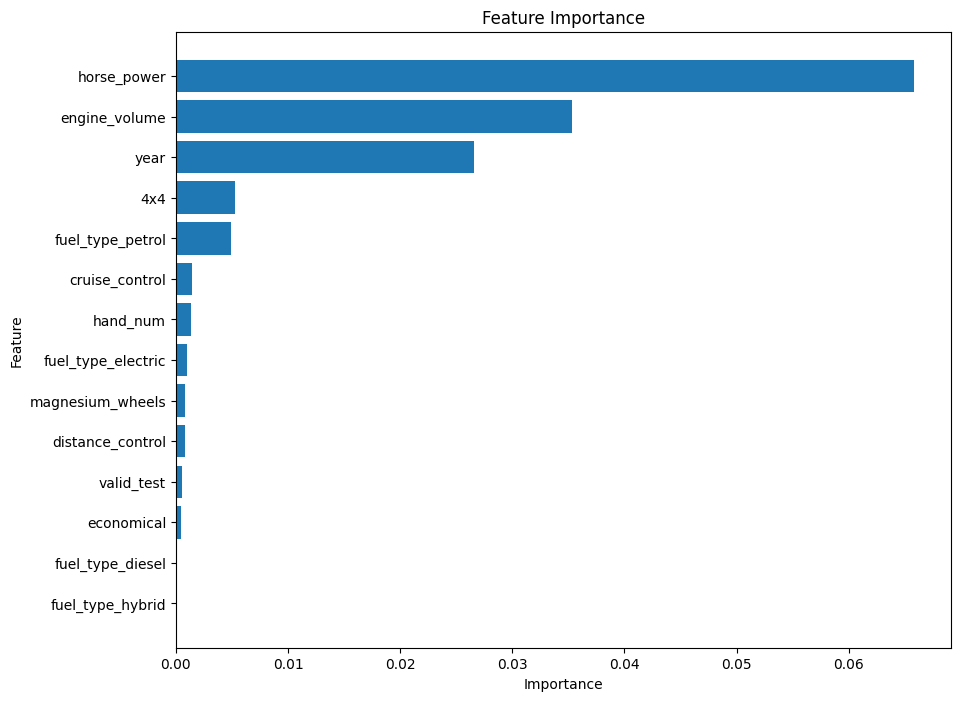

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = xgb_model.feature_importances_

# Get feature names after one-hot encoding
feature_names = [col for col in (numerical_cols.tolist() + xgb_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols).tolist()) if 'brand' not in col and 'model' not in col]

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances[:len(feature_names)]
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(25)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


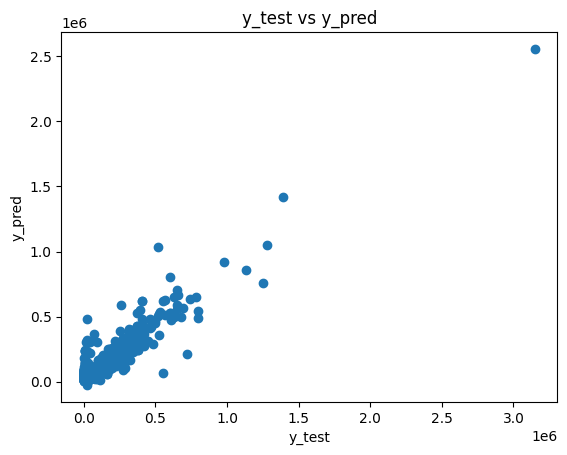

In [101]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()


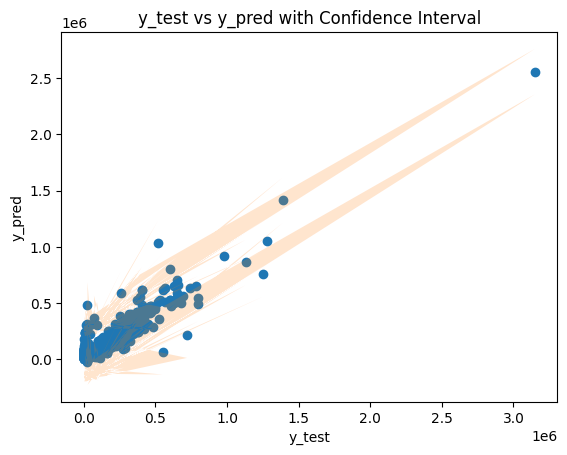

In [102]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_upper = y_pred + 1.96 * np.std(y_pred)
y_pred_lower = y_pred - 1.96 * np.std(y_pred)

plt.scatter(y_test, y_pred)
plt.fill_between(y_test, y_pred_lower, y_pred_upper, alpha=0.2)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred with Confidence Interval')
plt.show()


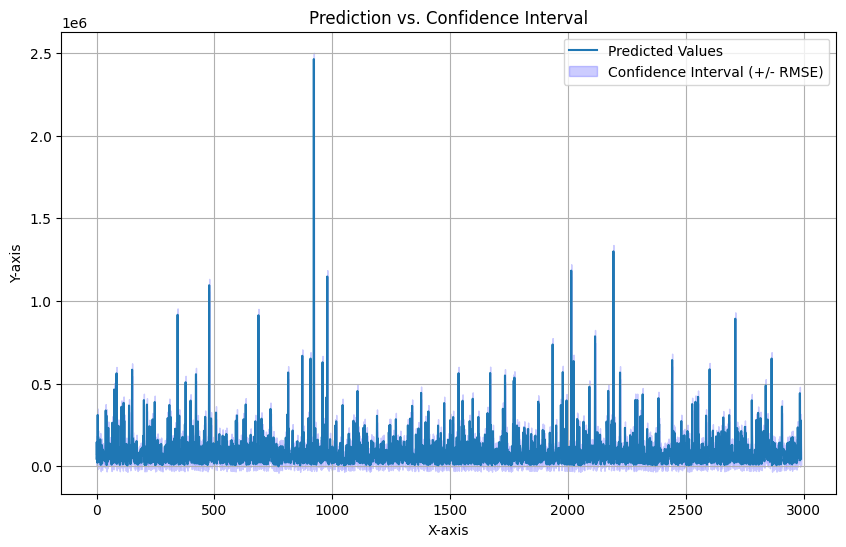

In [42]:

 # Replace with your actual predictions
rmse = 38499.21000364718  # Replace with your actual RMSE value

# Upper and lower confidence interval bounds (+/- RMSE)
y_upper = y_pred + rmse
y_lower = y_pred - rmse

# Original data (replace with your actual data if available)
# You can plot this if you have the original data for comparison
# x_data = np.linspace(0, 100, 100)  # Replace with your actual x-values
# y_data = np.sin(x_data) + np.random.randn(100) * 0.2  # Replace with your actual y-values

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values
plt.plot(y_pred, label='Predicted Values')

# Shade the confidence interval area
plt.fill_between(np.arange(len(y_pred)), y_upper, y_lower, alpha=0.2, color='b', label='Confidence Interval (+/- RMSE)')

# Plot original data (if available)
# plt.plot(x_data, y_data, 'o', label='Original Data')  # Uncomment if you have original data

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Prediction vs. Confidence Interval')

# Legend
plt.legend()

# Grid
plt.grid(True)

plt.show()

In [103]:
from xgboost import XGBRegressor
X_test = pd.DataFrame({'brand': ['Kia'], 'model': ['Picanto'], 'year': [2021], 'distance_control': [1], 'economical': [0], 'fuel_type': ['petrol'], 'hand_num': [1], 'cruise_control': [0], 'engine_volume': [1.0], 'magnesium_wheels': [1], 'car_name_en': ['Kia Picanto'], 'horse_power': [67.0], 'valid_test': [1], 'adaptive_cruise_control': [0], '4x4': [0]})
model = XGBRegressor()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
y_pred = pipeline.fit(X, y).predict(X_test)[0]
print(f'Predicted price for Kia Picanto using XGBRegressor: {y_pred}')


Predicted price for Kia Picanto using XGBRegressor: 63506.8515625


In [104]:
import pandas as pd

years = list(range(2012, 2024))
data = {'year': years}
df_years = pd.DataFrame(data)

for year in years:
    X_test = pd.DataFrame({'brand': ['Kia'], 'model': ['Picanto'], 'year': [year], 'distance_control': [1], 'economical': [0], 'fuel_type': ['petrol'], 'hand_num': [1], 'cruise_control': [0], 'engine_volume': [1.0], 'magnesium_wheels': [1], 'car_name_en': ['Kia Picanto'], 'horse_power': [67.0], 'valid_test': [1], 'adaptive_cruise_control': [0], '4x4': [0]})
    model = XGBRegressor()
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    y_pred = pipeline.fit(X, y).predict(X_test)[0]
    print(f'Predicted price for Kia Picanto in {year} using XGBRegressor: {y_pred}')



Predicted price for Kia Picanto in 2012 using XGBRegressor: 16577.33984375
Predicted price for Kia Picanto in 2013 using XGBRegressor: 19325.15234375
Predicted price for Kia Picanto in 2014 using XGBRegressor: 21727.44921875
Predicted price for Kia Picanto in 2015 using XGBRegressor: 25979.84765625
Predicted price for Kia Picanto in 2016 using XGBRegressor: 24571.22265625
Predicted price for Kia Picanto in 2017 using XGBRegressor: 28391.98828125
Predicted price for Kia Picanto in 2018 using XGBRegressor: 37583.5859375
Predicted price for Kia Picanto in 2019 using XGBRegressor: 46065.4609375
Predicted price for Kia Picanto in 2020 using XGBRegressor: 55856.00390625
Predicted price for Kia Picanto in 2021 using XGBRegressor: 63506.8515625
Predicted price for Kia Picanto in 2022 using XGBRegressor: 66401.0859375
Predicted price for Kia Picanto in 2023 using XGBRegressor: 69915.5546875


In [105]:
def get_car_info(brand, model):
    mean_price = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].mean()
    min_price = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].min()
    max_price = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].max()
    count_cars = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].count()
    print(f'Mean price over years: {mean_price}')
    print(f'Min price: {min_price}')
    print(f'Max price: {max_price}')
    print(f'Count of cars: {count_cars}')

get_car_info(['Kia'], ['Picanto'])


Mean price over years: 45125.34005763689
Min price: 1000.0
Max price: 90000.0
Count of cars: 347


In [49]:
unique_brand_model_pairs = df[['brand', 'model']].drop_duplicates()
print(unique_brand_model_pairs)

for index, row in unique_brand_model_pairs.iterrows():
    print(f"Calculations for {row['brand']} {row['model']}:")
    get_car_info([row['brand']], [row['model']])



               brand              model
0      Mercedes-Benz            A-Class
1                BMW           7 Series
2         Alfa Romeo             Giulia
3      Mercedes-Benz            S-Class
4                BMW           3 Series
...              ...                ...
15305        Pontiac           Solstice
15316          Mazda          B2500 4X4
15318           Opel  And Yoro Are Long
15338        Renault             Twingo
15441            Wey     Kofi 01 Coffee

[755 rows x 2 columns]
Calculations for Mercedes-Benz A-Class:
Mean price over years: 146193.5483870968
Min price: 5000.0
Max price: 419000.0
Count of cars: 31
Calculations for BMW 7 Series:
Mean price over years: 221756.73076923078
Min price: 9000.0
Max price: 495000.0
Count of cars: 26
Calculations for Alfa Romeo Giulia:
Mean price over years: 147385.7142857143
Min price: 92400.0
Max price: 215000.0
Count of cars: 7
Calculations for Mercedes-Benz S-Class:
Mean price over years: 161892.11111111112
Min price: 2999

In [50]:
calculations_df = pd.DataFrame(columns=['brand', 'model', 'mean_price', 'min_price', 'max_price', 'count_cars'])

data = []
for index, row in unique_brand_model_pairs.iterrows():
    brand = row['brand']
    model = row['model']
    mean_price = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].mean()
    min_price = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].min()
    max_price = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].max()
    count_cars = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].count()
    data.append({'brand': brand, 'model': model, 'mean_price': mean_price, 'min_price': min_price, 'max_price': max_price, 'count_cars': count_cars})

calculations_df = pd.DataFrame(data)

calculations_df


,brand,model,mean_price,min_price,max_price,count_cars
0,Mercedes-Benz,A-Class,146193.548387,5000.0,419000.0,31
1,BMW,7 Series,221756.730769,9000.0,495000.0,26
2,Alfa Romeo,Giulia,147385.714286,92400.0,215000.0,7
3,Mercedes-Benz,S-Class,161892.111111,2999.0,409999.0,27
4,BMW,3 Series,162177.776000,1000.0,370000.0,125
...,...,...,...,...,...,...
750,Pontiac,Solstice,69900.000000,69900.0,69900.0,1
751,Mazda,B2500 4X4,25000.000000,25000.0,25000.0,1
752,Opel,And Yoro Are Long,85000.000000,85000.0,85000.0,1
753,Renault,Twingo,30000.000000,30000.0,30000.0,1


In [167]:
calculations_df.to_csv('statictics_by)beand-model.csv')
df.to_csv('11-06-24_for_visual2.csv')

In [166]:
df =pd.read_csv('11-06-24_for_visual.csv')
df

,Unnamed: 0,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control,country
0,0,Mercedes-Benz,A-CLAss,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0,Germany
1,1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1,Germany
2,2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0,Italy
3,3,Mercedes-Benz,S-CLAss,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0,Germany
4,4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,14935,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1,Japan
14936,14936,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0,Japan
14937,14937,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0,France
14938,14938,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0,Japan


In [146]:
from openai import OpenAI
import api_keys_chat

api_key = api_keys_chat.api_key
client = OpenAI(api_key=api_key)

def generate_answer(text):
    client = OpenAI(api_key=api_key)
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "user", "content": text},
            ]
        )

        result = ''
        for choice in response.choices:
            result += choice.message.content

    except Exception as e:
        return f"Oops!! Some problems with openAI. Reason: {e}"

    return result

In [147]:
def get_brand_model(car_name):
    response = generate_answer(f"Extract brand and model from: {car_name}. You should return only brand and model separated with ';' and nothing else. Do not write anything except the brand and model separated by ';'. If it is written in hebrew traslate it to english.")
    parts = response.split(';')
    if len(parts) == 2:
        brand, model = parts
    else:
        brand, model = 'Unknown', 'Unknown'
    return brand, model

def get_country(model):
    response = generate_answer(f"Extract country from: {model}. You should return only country name based on the model name. If it is written in hebrew traslate it to english. If you do not know the country for brand return 'Unknown'")
    if response:
        return response
    else:
        return 'Unknown'

In [150]:
unique_brand = pd.DataFrame(df['brand'].unique(), columns=['brand'])
unique_brand

,brand
0,Mercedes-Benz
1,BMW
2,Alfa Romeo
3,Toyota
4,Hyundai
...,...
59,Ferrari
60,Bentley
61,Hummer
62,Pontiac


In [161]:
unique_brand

,brand,country
0,Mercedes-Benz,Germany
1,BMW,Germany
2,Alfa Romeo,Italy
3,Toyota,Japan
4,Hyundai,South Korea
...,...,...
59,Ferrari,Italy
60,Bentley,United Kingdom
61,Hummer,United States
62,Pontiac,United States


In [162]:
df['country'] = df['brand'].map(unique_brand.set_index('brand')['country'])
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control,country
0,Mercedes-Benz,A-CLAss,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0,Germany
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1,Germany
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0,Italy
3,Mercedes-Benz,S-CLAss,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0,Germany
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1,Japan
14936,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0,Japan
14937,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0,France
14938,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0,Japan


In [153]:
unique_brand.loc[unique_brand['brand'] == 'Genesis', 'country'] = 'United Kingdom'


In [156]:
unique_brand.loc[unique_brand['brand'] == 'Wey', 'country'] = 'China'

In [157]:
unique_brand.loc[unique_brand['brand'] == 'Mann', 'country'] = 'Germany'

In [158]:
unique_brand.loc[unique_brand['brand'] == 'Mini', 'country'] = 'United Kingdom'

In [159]:
unique_brand.loc[unique_brand['brand'] == 'DS', 'country'] = 'France'
unique_brand.loc[unique_brand['brand'] == 'Bentley', 'country'] = 'United Kingdom'
unique_brand.loc[unique_brand['brand'] == 'Smart', 'country'] = 'Germany'

In [160]:
unique_brand.to_csv('brand-country_mapping.csv')

In [137]:
unique_model = pd.DataFrame(df['model'].unique(), columns=['model'])
unique_model

,model
0,A-Class
1,7 Series
2,Giulia
3,S-Class
4,3 Series
...,...
734,Solstice
735,B2500 4X4
736,And Yoro Are Long
737,Twingo


In [143]:
answer = generate_answer(f'Find out mistakes of other problem in this list of models. Which one need to replace or to group:{df['model'].unique().tolist()}')

In [144]:
print(answer)

Looking at the list, the following corrections are needed:

1. 'A' needs to be replaced with a specific car model, as it's not clear what 'A' refers to.

2. 'C' is too vague. Without a brand or additional model information, it can't be attributed to a specific car model.

3. 'Romeo' should be 'Alfa Romeo'. The brand name and model are typically paired together. 

4.  'Bclass Taxi' should be 'B-Class' with 'Taxi' removed or classified separately as this is not part of the model name.

5. 'Rover Range' should be 'Range Rover'. The order has been mixed up.

6. 'Glc', 'Cls', 'Cx5', 'Xv', 'Wrangler', 'Asx', 'Buys', 'Rx450H', 'Vclass', 'A', 'Gl', 'Rover Range', 'Cx30', 'C', 'Bclass Taxi', 'I10', 'Xt5', 'Xm', 'Rover Discovery Sport', 'I20 Cross', 'I20', 'Cclass Taxi', 'Berlingo 3Rd Generation 2018 Onwards', 'Bclass', 'Iphone 2X4', 'I30Cw', 'I30', 'Cle', 'Romeo Stelvio', 'Blazer 2019 And Later', 'I35', 'Cla',  'Sclass', 'I8', 'Rover Discovery 4', 'Xf', 'Gla', 'Nx', 'Qx55', 'Refs' have incorrec